In [1]:
import pandas as pd

## Milestone 2, Task 3:
Create a function which will load a dataset from a csv file into a Pandas df.

In [2]:
def create_df(file_path):
    df = pd.read_csv(file_path)
    print(df.shape)
    return df

In [3]:
file_path = 'C:/Users/Chris/Documents/AiCoreEDA_Project/customer_activity.csv'

df = create_df(file_path)
df

(12330, 17)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.000000,0,0.00,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.000000,0,0.00,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.400000,0,0.00,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.000000,0,0.00,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.000000,0,0.00,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,NaN,134.000000,4,112.22,48.0,1898.0,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5.0,NaN,1,0.00,67.0,2202.0,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0.0,0.000000,0,0.00,13.0,316.0,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False
12328,5.0,98.000000,0,0.00,46.0,1469.0,0.0442,0.069,0.0,Sep,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False


## Milestone 3, Task 1:
Check for null values and data types:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            11760 non-null  float64
 1   administrative_duration   11418 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    11994 non-null  float64
 4   product_related           11751 non-null  float64
 5   product_related_duration  12129 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   month                     12330 non-null  object 
 10  operating_systems         12319 non-null  object 
 11  browser                   12330 non-null  object 
 12  region                    12330 non-null  object 
 13  traffic_type              12330 non-null  object 
 14  visito

Identifying Dtype to change:
- numerical columns to int/float? can we use int32/float32 to save memory?
- administrative_duration, informational_duration and product_related_durationto datetime64?
- product_related to int?
- month to datetime64 or period?
- operating_system, browser, region, traffic_type and visitor_type to category


Create a DataTransform class to handle the conversion of column data types:

In [5]:
from transformations import DataTransform

In [6]:
transform_instance = DataTransform(df)
transform_instance.to_category('traffic_type', 'operating_systems', 'browser', 'region', 'visitor_type')
transform_instance.to_datetime('administrative_duration', 'informational_duration', 'product_related_duration')
transform_instance.to_Int('administrative','product_related')

In [7]:
df.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0 days 00:00:00,0,0 days,4,0 days 00:00:00,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0 days 00:00:00,0,0 days,26,0 days 00:14:36,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,0 days 00:01:39.400000,0,0 days,19,0 days 00:06:08,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0 days 00:00:00,0,0 days,20,0 days 00:23:52,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0 days 00:00:00,0,0 days,33,0 days 00:11:34,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            11760 non-null  Int64          
 1   administrative_duration   11418 non-null  timedelta64[ns]
 2   informational             12330 non-null  int64          
 3   informational_duration    11994 non-null  timedelta64[ns]
 4   product_related           11751 non-null  Int64          
 5   product_related_duration  12129 non-null  timedelta64[ns]
 6   bounce_rates              12330 non-null  float64        
 7   exit_rates                12330 non-null  float64        
 8   page_values               12330 non-null  float64        
 9   month                     12330 non-null  object         
 10  operating_systems         12319 non-null  category       
 11  browser                   12330 non-null  category       
 12  regi

### Results:
All changed data types, except product_related which is now Int64 (note capital "I") which is a nullable array. 


# Milestone 3, Task 2: 
Create a class to get information from the df:

In [9]:
from df_info import DataFrameInfo

info = DataFrameInfo(df)

#### Data types:

In [10]:
info.df_data_type()

The data type for each column is listed below:


administrative                        Int64
administrative_duration     timedelta64[ns]
informational                         int64
informational_duration      timedelta64[ns]
product_related                       Int64
product_related_duration    timedelta64[ns]
bounce_rates                        float64
exit_rates                          float64
page_values                         float64
month                                object
operating_systems                  category
browser                            category
region                             category
traffic_type                       category
visitor_type                       category
weekend                                bool
revenue                                bool
dtype: object

#### Stats:

In [11]:
info.df_stats()

A statistical summary of the numerical columns is below:


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values
count,11760.0,11418,12330.000000,11994,11751.0,12129,12330.000000,12330.000000,12330.000000
mean,2.308844,0 days 00:01:24.539078957,0.497080,0 days 00:00:34.486687374,32.814824,0 days 00:19:52.426086239,0.022381,0.042820,5.556310
std,3.364905,0 days 00:02:59.392485097,1.174194,0 days 00:02:16.201556649,44.597841,0 days 00:29:27.243801709,0.048847,0.048578,17.397345
min,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00,0.000000,0.000000,0.000000
25%,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,8.0,0 days 00:03:12,0.000000,0.014000,0.000000
50%,1.0,0 days 00:00:06,0.000000,0 days 00:00:00,18.0,0 days 00:09:46,0.003500,0.025000,0.000000
75%,4.0,0 days 00:01:35,0.000000,0 days 00:00:00,38.0,0 days 00:23:45,0.017600,0.049000,0.000000
max,24.0,0 days 00:35:55,12.000000,0 days 00:33:08.750000,485.0,0 days 06:37:46,0.200000,0.200000,254.600000


#### Shape:

In [12]:
info.df_shape()

'The dataset has 12330 columns and 17 rows.'

#### Distinct values for categorical data:

In [13]:
info.df_category_distinct_values()

The frequency of unique values for each column containing categorical data is below:

operating_systems
Windows     6596
MACOS       2676
Android     2584
iOS          385
ChromeOS      62
Ubuntu         9
Other          7
Name: count, dtype: int64

browser
Google Chrome        7721
Safari               2527
Mozilla Firefox       830
Microsoft Edge        582
Internet Explorer     156
Samsung Internet      145
Opera                 136
Android               121
QQ                     53
Sogou Explorer         47
Yandex                  8
UC Browser              2
Undetermined            2
Name: count, dtype: int64

region
North America      4869
Western Europe     2283
Eastern Europe     1154
Asia               1143
South America       913
Africa              770
Northern Africa     499
Southern Africa     423
Oceania             276
Name: count, dtype: int64

traffic_type
Google search          3990
Facebook ads           2322
Instagram ads          2193
Bing search            1174
Yo

#### Null percentages:

In [14]:
info.df_null_info()

For any columns containing null values the percentage of null values for that column is:

administrative is: 4.62 %
administrative_duration is: 7.4 %
informational_duration is: 2.73 %
product_related is: 4.7 %
product_related_duration is: 1.63 %
operating_systems is: 0.09 %


# Milestone 3, Task 3: 
Remove/impute missing values in the data:

In [15]:
from plotter import Plotter

In [16]:
# This function is used to generate useful info on null-values:
info = DataFrameInfo(df)
df_plots = Plotter(df)

def get_null_info():
    info.df_null_info()
    print()
    print('A matrix to visualize the pattern of missing values in each column:')
    df_plots.missing_no_matrix()
    print()
    print('A heatmap to visualize to visualize the correlation of missingness between every two columns:')
    df_plots.missing_no_heatmap()
    print()
    print('A bar chart to quantify the number of missing values in each column:')
    df_plots.missing_no_bar()

For any columns containing null values the percentage of null values for that column is:

administrative is: 4.62 %
administrative_duration is: 7.4 %
informational_duration is: 2.73 %
product_related is: 4.7 %
product_related_duration is: 1.63 %
operating_systems is: 0.09 %

A matrix to visualize the pattern of missing values in each column:

A heatmap to visualize to visualize the correlation of missingness between every two columns:

A bar chart to quantify the number of missing values in each column:


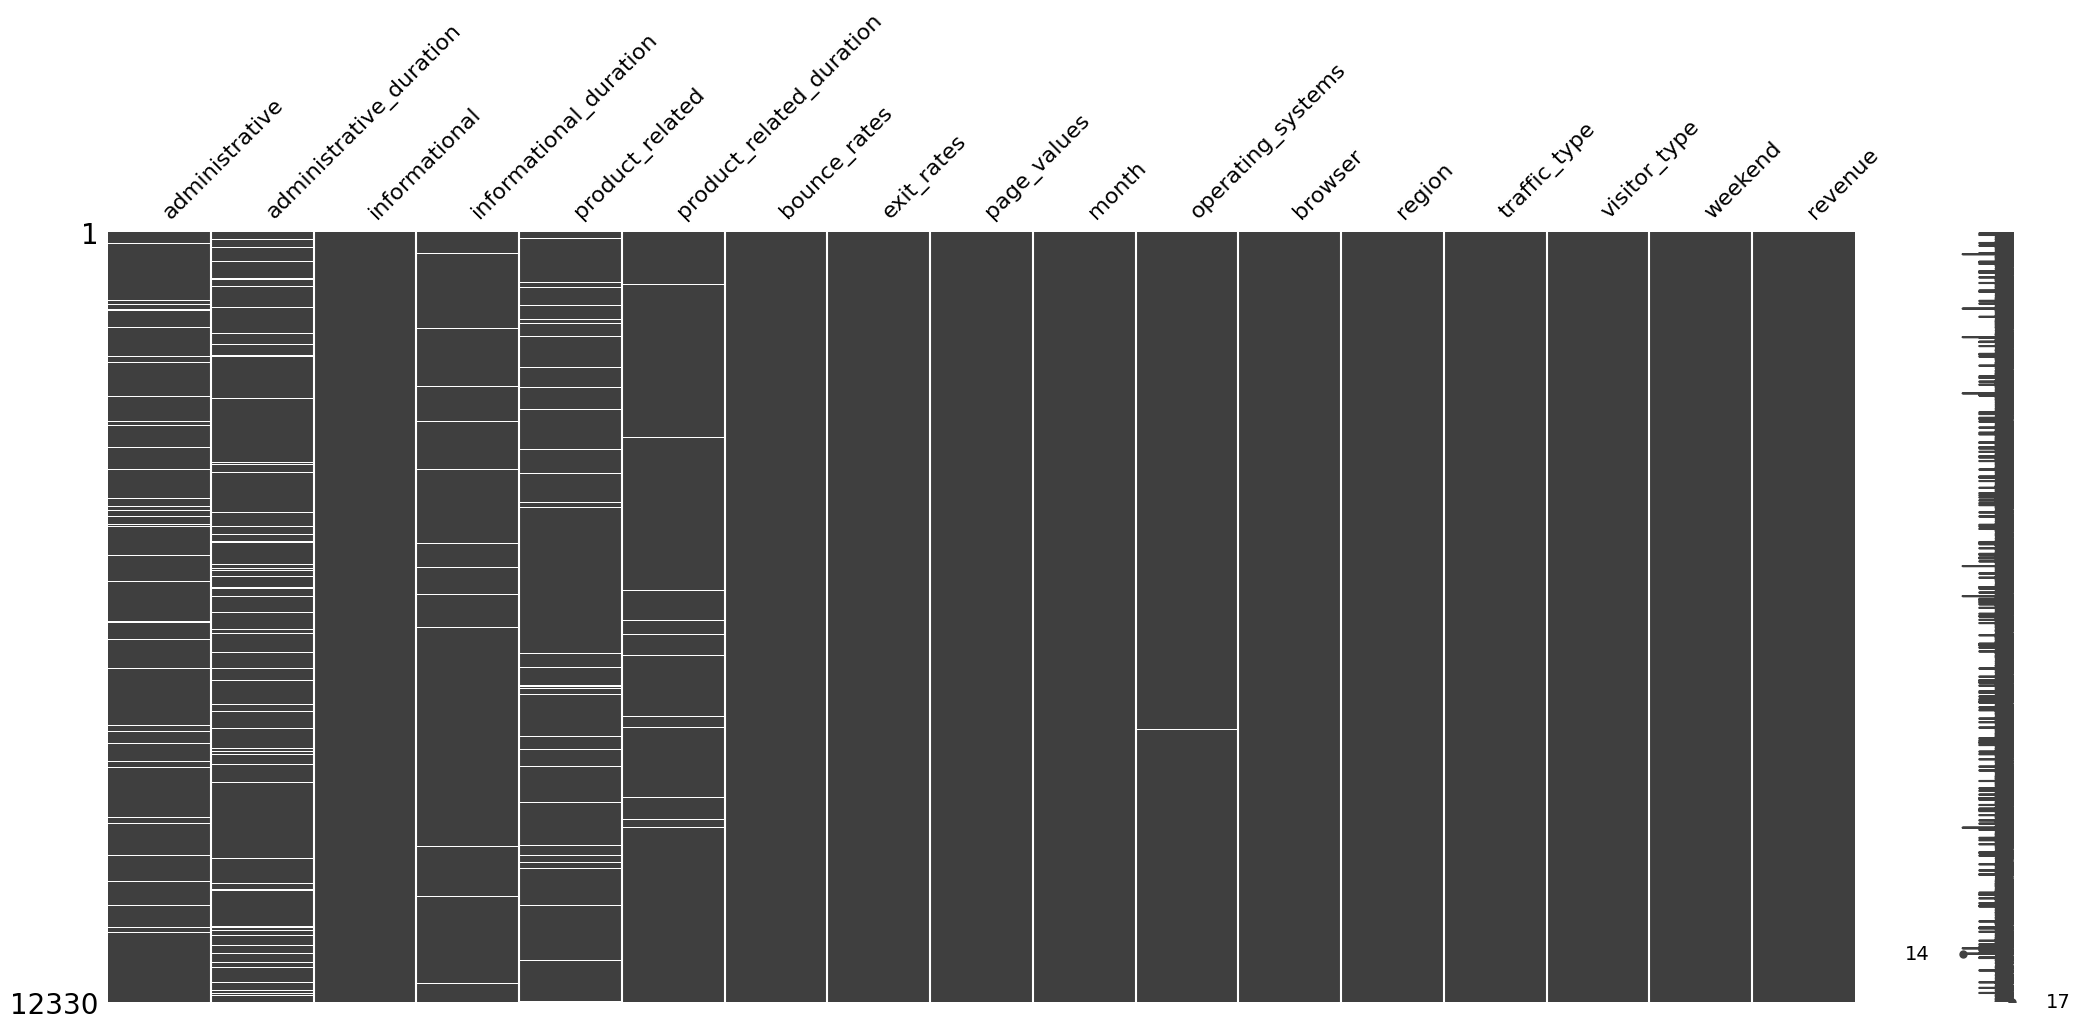

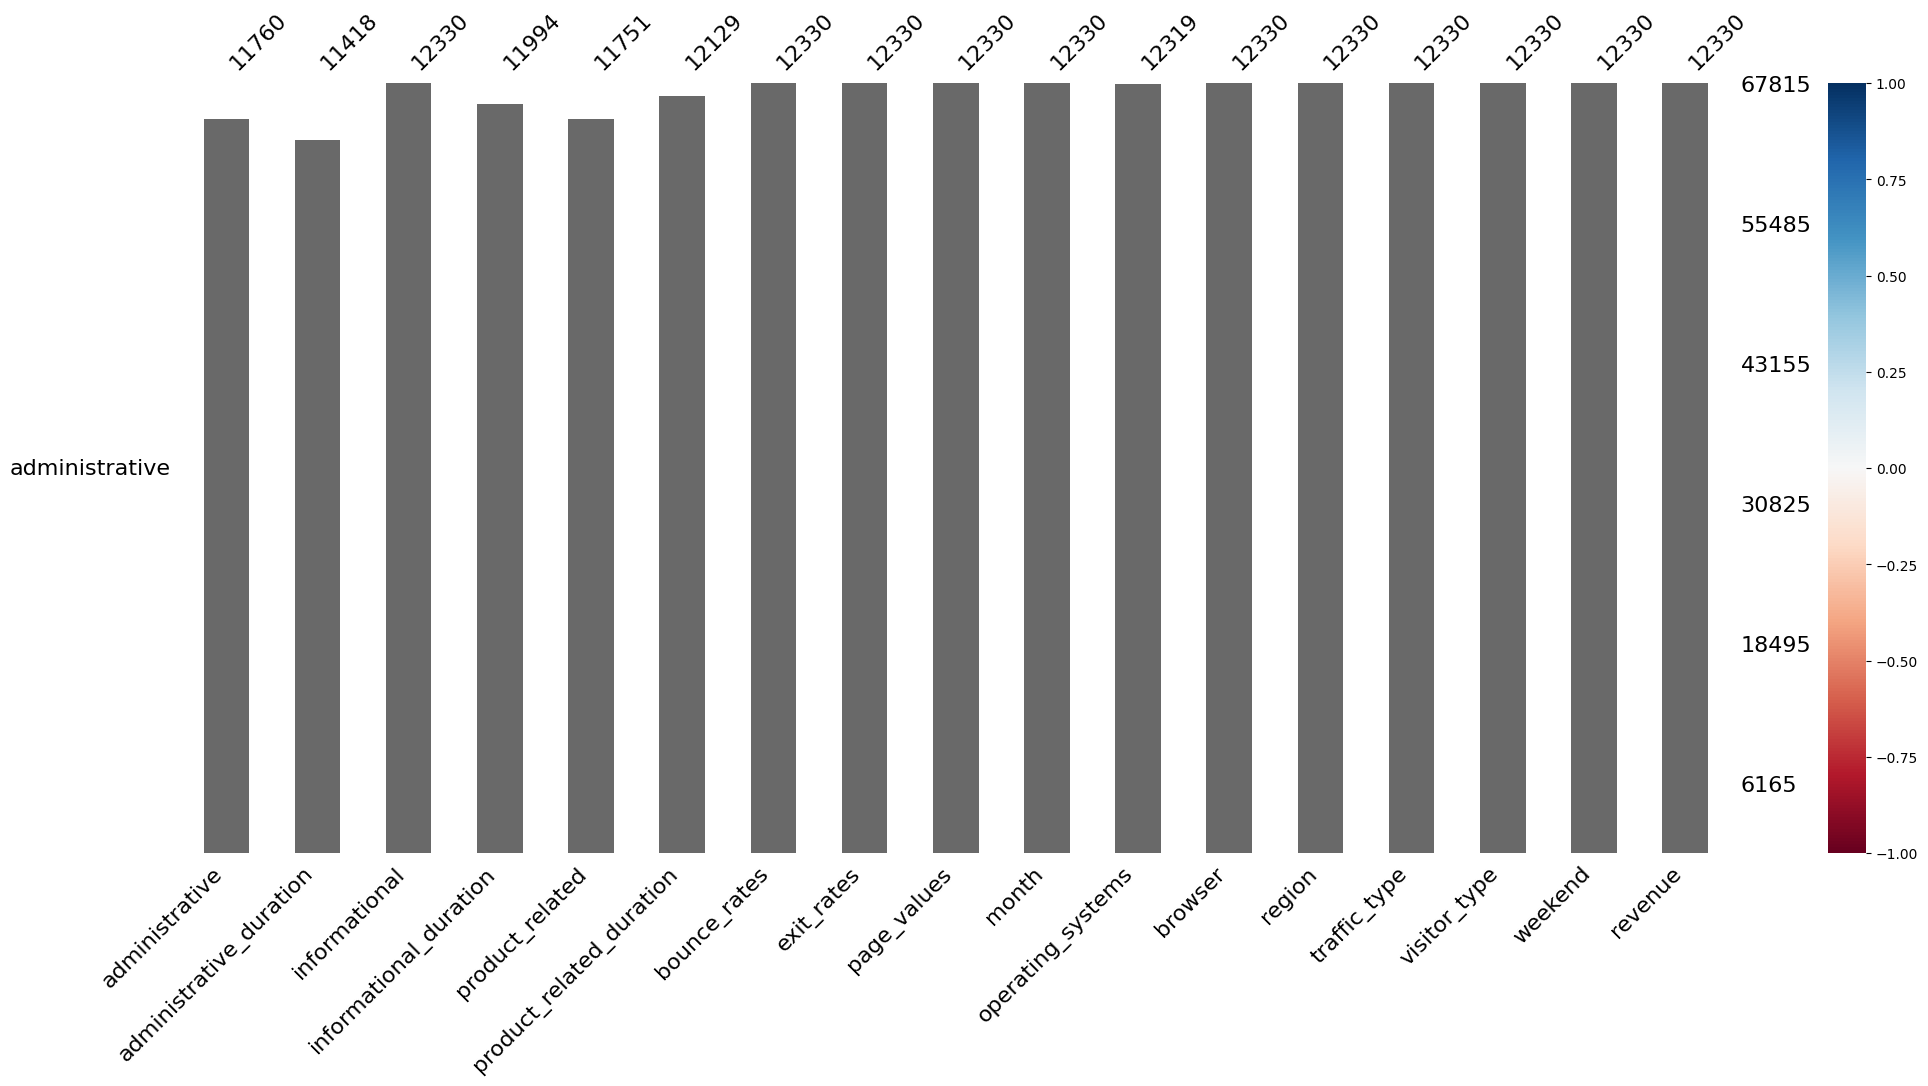

In [17]:
get_null_info()

#### Results:

Heatmap shows the correlation of missingness between every 2 columns.
- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

Therefore, there is no dependence between the occurence of missing values between any two variables. 

#### The variables with missing values are:
- administrative: Columns which indicate which administrative activity the user was performing on their account.
- administrative_duration: How long a user performed administrative tasks in that session.
- informational_duration: How long a users performed informational tasks in seconds during that session.
- product_related: Indicates which product the user was viewing on the website.
- product_related_duration: How long a user browsed products during that session.
- operating_systems: The operating system the user was using.

### administrative

administrative column indicates which administrative activity the user was performing on their account.

The percentage of null values in 4.62 %. We may want to impute the data or drop the rows.

First we check the probability distribution:

Value counts:
administrative
0     5644
1     1237
2     1018
3      885
4      661
5      541
6      401
7      314
8      259
9      227
10     165
11      97
12      93
13      65
14      42
15      37
16      25
17      15
18      14
21       5
19       5
23       4
24       4
20       2
Name: count, dtype: Int64

Probability:
administrative
0     0.479932
1     0.105187
2     0.086565
3     0.075255
4     0.056207
5     0.046003
6     0.034099
7     0.026701
8     0.022024
9     0.019303
10    0.014031
11    0.008248
12    0.007908
13    0.005527
14    0.003571
15    0.003146
16    0.002126
17    0.001276
18     0.00119
21    0.000425
19    0.000425
23     0.00034
24     0.00034
20     0.00017
Name: proportion, dtype: Float64


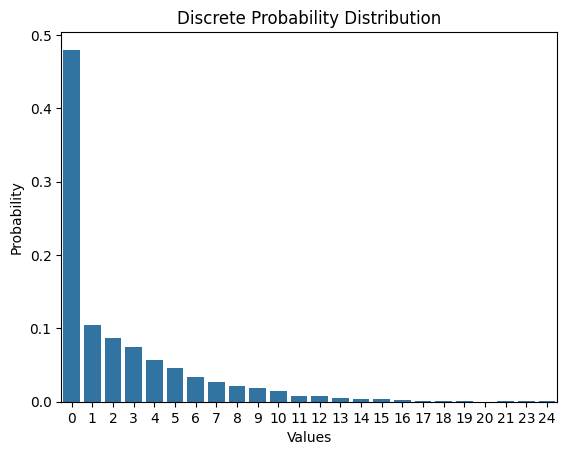

The mode of the distribution is 0
The mean of the distribution is 2.308843537414966
The median of the distribution is 1.0


In [18]:
df_plots.probability_distribution('administrative')

Assuming the nulls are randomly distributed the mean, median or mode could be used to impute them. These data also look to be ordinal categorical data, which typically favour the use of the mode to impute null values. The fact that almost 50% of the data make up the mode would support this choice.

To support this choice, let's look for some evidence for the missing-completly-at-random assumption. One option comes from the administrative_duration column, which might be expected to be correlated to administrative.

<Axes: >

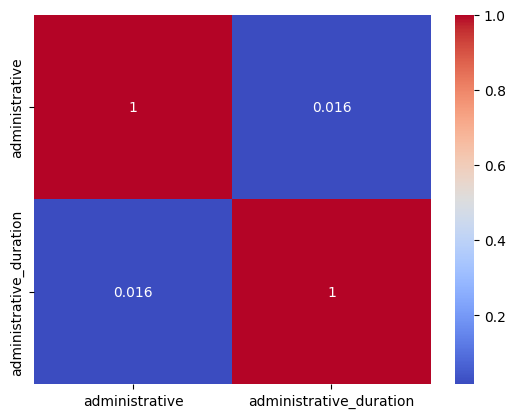

In [19]:
# Check correlation between 'administrative' and 'administrative_duration':

df_plots.correlation('administrative', 'administrative_duration')

There is only a weak correlation between the two variables. 
Another option comes from the product_related column, which might be expected to be correlated to administrative.

<Axes: >

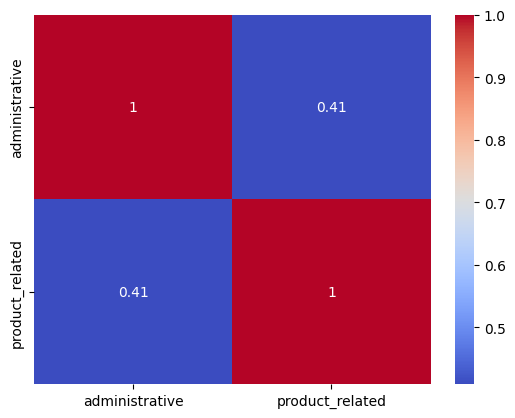

In [20]:
# Check correlation between 'administrative' and 'product_related':

df_plots.correlation('administrative', 'product_related')

There is a higher correlation between the two columns (41%). Therefore, the Chi-squared test could be used to determine if there is a trend in frequency of null-values in administrative, as a function of product_related.

In [21]:
df_plots.chi_squared('administrative', 'product_related')

Chi-square statistic = 287.0721467084235
p-value = 0.6186138920791466


The p-value is significantly greater than 0.05 suggesting that the null-values are randomly distributed with respect to the value of product_related. 

Therefore, the mode could be used to impute the null-values in administrative.

In [22]:
from transformations import DataFrameTransform

In [23]:
transform = DataFrameTransform(df)
df_transformed = transform.impute_mode('administrative')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            12330 non-null  Int64          
 1   administrative_duration   11418 non-null  timedelta64[ns]
 2   informational             12330 non-null  int64          
 3   informational_duration    11994 non-null  timedelta64[ns]
 4   product_related           11751 non-null  Int64          
 5   product_related_duration  12129 non-null  timedelta64[ns]
 6   bounce_rates              12330 non-null  float64        
 7   exit_rates                12330 non-null  float64        
 8   page_values               12330 non-null  float64        
 9   month                     12330 non-null  object         
 10  operating_systems         12319 non-null  category       
 11  browser                   12330 non-null  category       
 12  regi

### administrative_duration

How long a user performed administrative tasks in that session.

Decided to drop variable because it has high percentage (>7%) of null values. A lot of data would be lost if rows were to be dropped. There is no correlation between the administrative_duration and the revenue or product_related either. So the safest route is to delete the entire variable.

<Axes: >

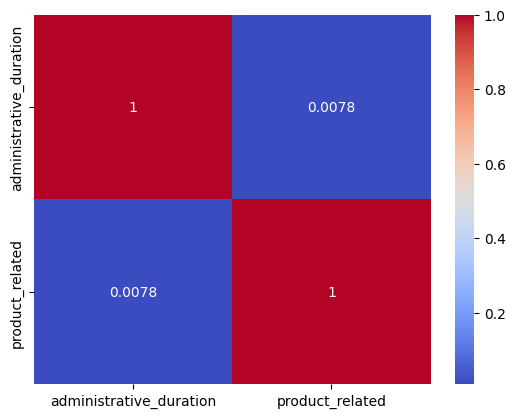

In [24]:
df_plots.correlation('administrative_duration', 'product_related')

<Axes: >

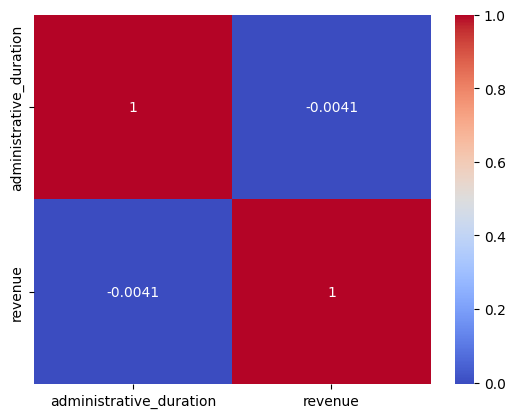

In [25]:
df_plots.correlation('administrative_duration', 'revenue')

In [26]:
transform = DataFrameTransform(df_transformed)
df_transformed = transform.drop_columns('administrative_duration')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            12330 non-null  Int64          
 1   informational             12330 non-null  int64          
 2   informational_duration    11994 non-null  timedelta64[ns]
 3   product_related           11751 non-null  Int64          
 4   product_related_duration  12129 non-null  timedelta64[ns]
 5   bounce_rates              12330 non-null  float64        
 6   exit_rates                12330 non-null  float64        
 7   page_values               12330 non-null  float64        
 8   month                     12330 non-null  object         
 9   operating_systems         12319 non-null  category       
 10  browser                   12330 non-null  category       
 11  region                    12330 non-null  category       
 12  traf

### informational_duration

How long a users performed informational tasks in seconds during that session.

The percentage of null values in 2.73 %. We may want to impute the data or drop the rows.

First we check the probability distribution:

Value counts:
informational_duration
0 days 00:00:00              9520
0 days 00:00:06                39
0 days 00:00:17                30
0 days 00:00:13                28
0 days 00:00:07                26
                             ... 
0 days 00:00:40.333333330       1
0 days 00:01:02.200000          1
0 days 00:01:17.600000          1
0 days 00:18:05.622828          1
0 days 00:01:52.220000          1
Name: count, Length: 1280, dtype: int64

Probability:
informational_duration
0 days 00:00:00              0.793730
0 days 00:00:06              0.003252
0 days 00:00:17              0.002501
0 days 00:00:13              0.002335
0 days 00:00:07              0.002168
                               ...   
0 days 00:00:40.333333330    0.000083
0 days 00:01:02.200000       0.000083
0 days 00:01:17.600000       0.000083
0 days 00:18:05.622828       0.000083
0 days 00:01:52.220000       0.000083
Name: proportion, Length: 1280, dtype: float64


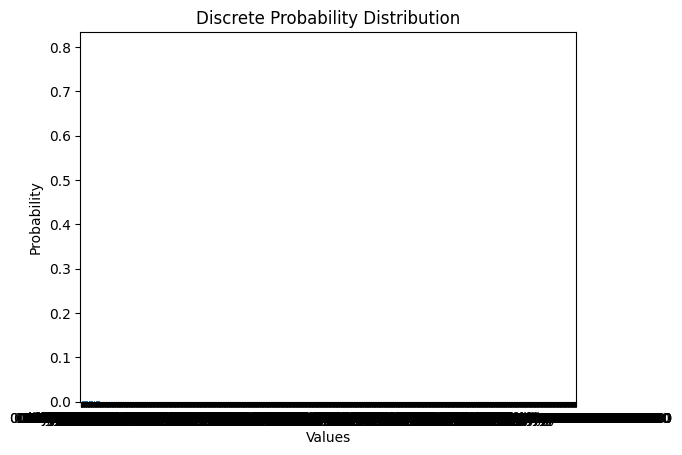

The mode of the distribution is 0 days 00:00:00
The mean of the distribution is 0 days 00:00:34.486687374
The median of the distribution is 0 days 00:00:00


In [27]:
df_plots.probability_distribution('informational_duration')

Almost 80% of these data are 0, therefore it is probably safest to impute the data using the mode.

In [28]:
transform = DataFrameTransform(df_transformed)
df_transformed = transform.impute_mode('informational_duration')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            12330 non-null  Int64          
 1   informational             12330 non-null  int64          
 2   informational_duration    12330 non-null  timedelta64[ns]
 3   product_related           11751 non-null  Int64          
 4   product_related_duration  12129 non-null  timedelta64[ns]
 5   bounce_rates              12330 non-null  float64        
 6   exit_rates                12330 non-null  float64        
 7   page_values               12330 non-null  float64        
 8   month                     12330 non-null  object         
 9   operating_systems         12319 non-null  category       
 10  browser                   12330 non-null  category       
 11  region                    12330 non-null  category       
 12  traf

### product_related

Indicates which product the user was viewing on the website.

The percentage of null values in 4.7 %. We may want to impute the data or drop the rows.

First we check the probability distribution:

Value counts:
product_related
1      582
2      426
3      422
5      385
6      378
      ... 
338      1
238      1
304      1
249      1
436      1
Name: count, Length: 296, dtype: Int64

Probability:
product_related
1      0.049528
2      0.036252
3      0.035912
5      0.032763
6      0.032167
         ...   
338    0.000085
238    0.000085
304    0.000085
249    0.000085
436    0.000085
Name: proportion, Length: 296, dtype: Float64


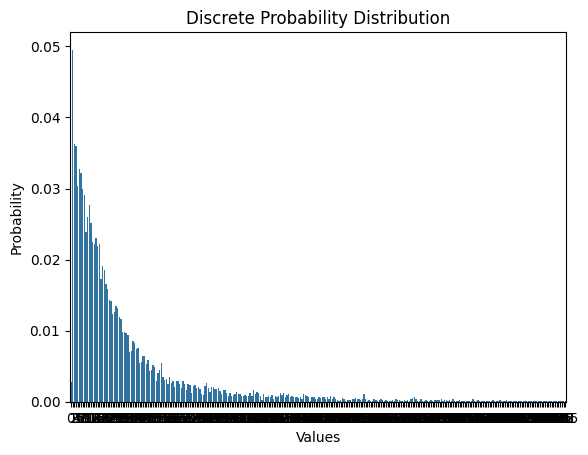

The mode of the distribution is 1
The mean of the distribution is 32.81482427027487
The median of the distribution is 18.0


In [29]:
df_plots.probability_distribution('product_related')

The product_related indicates which product the user was viewing on the website.

As we can see there are over 400 products in this dataset. Imputing the data would risk biasing any future analysis. Considering the key variable the safest option is to drop the rows.

In [30]:
transform = DataFrameTransform(df_transformed)
df_transformed = transform.drop_rows_from_columns('product_related')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11751 entries, 0 to 12328
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            11751 non-null  Int64          
 1   informational             11751 non-null  int64          
 2   informational_duration    11751 non-null  timedelta64[ns]
 3   product_related           11751 non-null  Int64          
 4   product_related_duration  11565 non-null  timedelta64[ns]
 5   bounce_rates              11751 non-null  float64        
 6   exit_rates                11751 non-null  float64        
 7   page_values               11751 non-null  float64        
 8   month                     11751 non-null  object         
 9   operating_systems         11742 non-null  category       
 10  browser                   11751 non-null  category       
 11  region                    11751 non-null  category       
 12  traffic_t

### product_related_duration

How long a user browsed products during that session.

The percentage of null values in 1.63 %. We may want to impute the data or drop the rows.

First we check the probability distribution:

Value counts:
product_related_duration
0 days 00:00:00    747
0 days 00:00:34     23
0 days 00:01:06     23
0 days 00:00:12     22
0 days 00:01:12     21
                  ... 
0 days 00:49:31      1
0 days 00:53:53      1
0 days 01:23:14      1
0 days 00:21:18      1
0 days 00:31:38      1
Name: count, Length: 3494, dtype: int64

Probability:
product_related_duration
0 days 00:00:00    0.061588
0 days 00:00:34    0.001896
0 days 00:01:06    0.001896
0 days 00:00:12    0.001814
0 days 00:01:12    0.001731
                     ...   
0 days 00:49:31    0.000082
0 days 00:53:53    0.000082
0 days 01:23:14    0.000082
0 days 00:21:18    0.000082
0 days 00:31:38    0.000082
Name: proportion, Length: 3494, dtype: float64


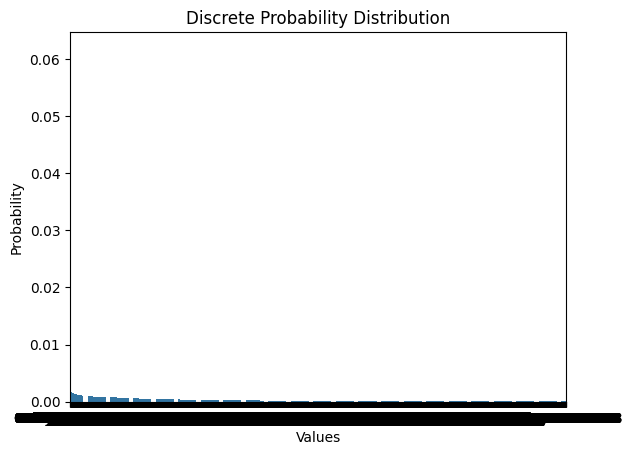

The mode of the distribution is 0 days 00:00:00
The mean of the distribution is 0 days 00:19:52.426086239
The median of the distribution is 0 days 00:09:46


In [31]:
df_plots.probability_distribution('product_related_duration')

Over 60% of the data is 0, so the mode could be used to impute the data. Alternatively, we could impute the data using the median.

To check any correlation between product_related_duration and other key variables:

<Axes: >

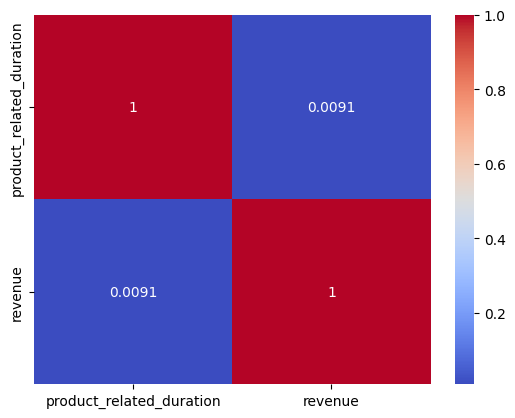

In [32]:
df_plots.correlation('product_related_duration', 'revenue')

<Axes: >

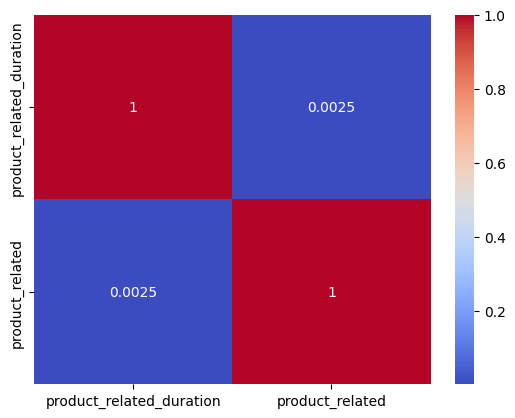

In [33]:
df_plots.correlation('product_related_duration', 'product_related')

Imputing these values with the mode may be the safest option.

In [34]:
transform = DataFrameTransform(df_transformed)
df_transformed = transform.impute_mode('product_related_duration')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11751 entries, 0 to 12328
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            11751 non-null  Int64          
 1   informational             11751 non-null  int64          
 2   informational_duration    11751 non-null  timedelta64[ns]
 3   product_related           11751 non-null  Int64          
 4   product_related_duration  11751 non-null  timedelta64[ns]
 5   bounce_rates              11751 non-null  float64        
 6   exit_rates                11751 non-null  float64        
 7   page_values               11751 non-null  float64        
 8   month                     11751 non-null  object         
 9   operating_systems         11742 non-null  category       
 10  browser                   11751 non-null  category       
 11  region                    11751 non-null  category       
 12  traffic_t

### operating_systems

The operating system the user was using.

The percentage of null values in 0.09 %. We may want to impute the data or drop the rows.

First we check the probability distribution:

Value counts:
operating_systems
Windows     6596
MACOS       2676
Android     2584
iOS          385
ChromeOS      62
Ubuntu         9
Other          7
Name: count, dtype: int64

Probability:
operating_systems
Windows     0.535433
MACOS       0.217225
Android     0.209757
iOS         0.031253
ChromeOS    0.005033
Ubuntu      0.000731
Other       0.000568
Name: proportion, dtype: float64


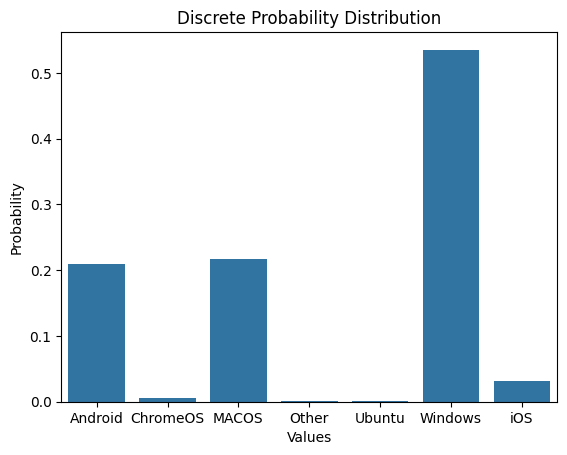

The mode of the distribution is Windows
The mean cannot be calculated on this data series
The median cannot be calculated on this data series


In [35]:
df_plots.probability_distribution('operating_systems')

As we are dealing with nominal categorical data the safest option is to impute the data using the mode.

In [36]:
transform = DataFrameTransform(df_transformed)
df_transformed = transform.impute_mode('operating_systems')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11751 entries, 0 to 12328
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            11751 non-null  Int64          
 1   informational             11751 non-null  int64          
 2   informational_duration    11751 non-null  timedelta64[ns]
 3   product_related           11751 non-null  Int64          
 4   product_related_duration  11751 non-null  timedelta64[ns]
 5   bounce_rates              11751 non-null  float64        
 6   exit_rates                11751 non-null  float64        
 7   page_values               11751 non-null  float64        
 8   month                     11751 non-null  object         
 9   operating_systems         11751 non-null  category       
 10  browser                   11751 non-null  category       
 11  region                    11751 non-null  category       
 12  traffic_t

### Transform data types:

Now that we have removed the null-values, the data type of administrative and product_related can be changed from Int to int.

In [37]:
transform_instance = DataTransform(df_transformed)
transform_instance.to_int('administrative', 'product_related')

In [38]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11751 entries, 0 to 12328
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            11751 non-null  int64          
 1   informational             11751 non-null  int64          
 2   informational_duration    11751 non-null  timedelta64[ns]
 3   product_related           11751 non-null  int64          
 4   product_related_duration  11751 non-null  timedelta64[ns]
 5   bounce_rates              11751 non-null  float64        
 6   exit_rates                11751 non-null  float64        
 7   page_values               11751 non-null  float64        
 8   month                     11751 non-null  object         
 9   operating_systems         11751 non-null  category       
 10  browser                   11751 non-null  category       
 11  region                    11751 non-null  category       
 12  traffic_t

I cannot work out where the missing_values column has come from!? Perhaps it occured during the testing of my code. But I do not need this column so I will delete it

In [39]:
transform = DataFrameTransform(df_transformed)
df_transformed = transform.drop_columns('missing_values')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11751 entries, 0 to 12328
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   administrative            11751 non-null  int64          
 1   informational             11751 non-null  int64          
 2   informational_duration    11751 non-null  timedelta64[ns]
 3   product_related           11751 non-null  int64          
 4   product_related_duration  11751 non-null  timedelta64[ns]
 5   bounce_rates              11751 non-null  float64        
 6   exit_rates                11751 non-null  float64        
 7   page_values               11751 non-null  float64        
 8   month                     11751 non-null  object         
 9   operating_systems         11751 non-null  category       
 10  browser                   11751 non-null  category       
 11  region                    11751 non-null  category       
 12  traffic_t

### Test for null-values:

For any columns containing null values the percentage of null values for that column is:


A matrix to visualize the pattern of missing values in each column:

A heatmap to visualize to visualize the correlation of missingness between every two columns:

A bar chart to quantify the number of missing values in each column:


c:\Users\Chris\Miniconda3\envs\EDA_Project_env\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Chris\Miniconda3\envs\EDA_Project_env\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


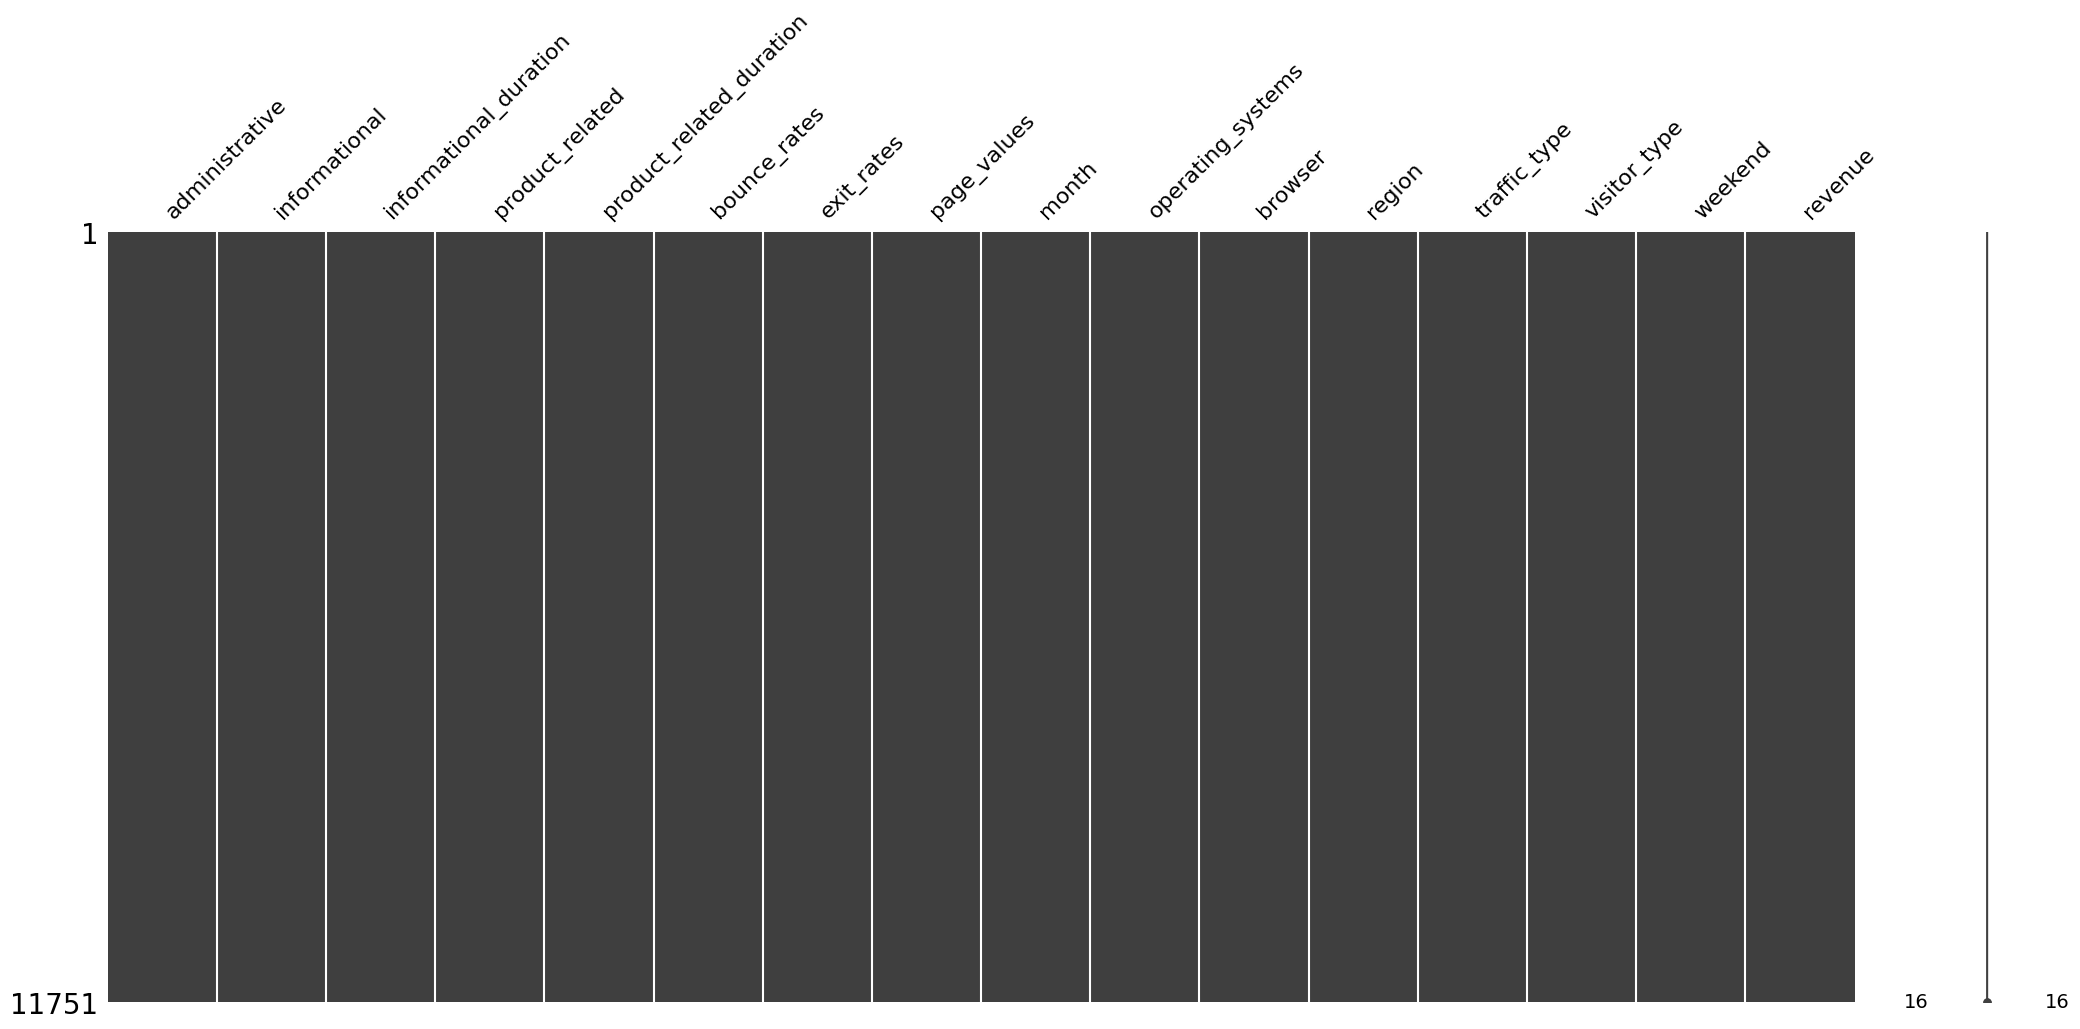

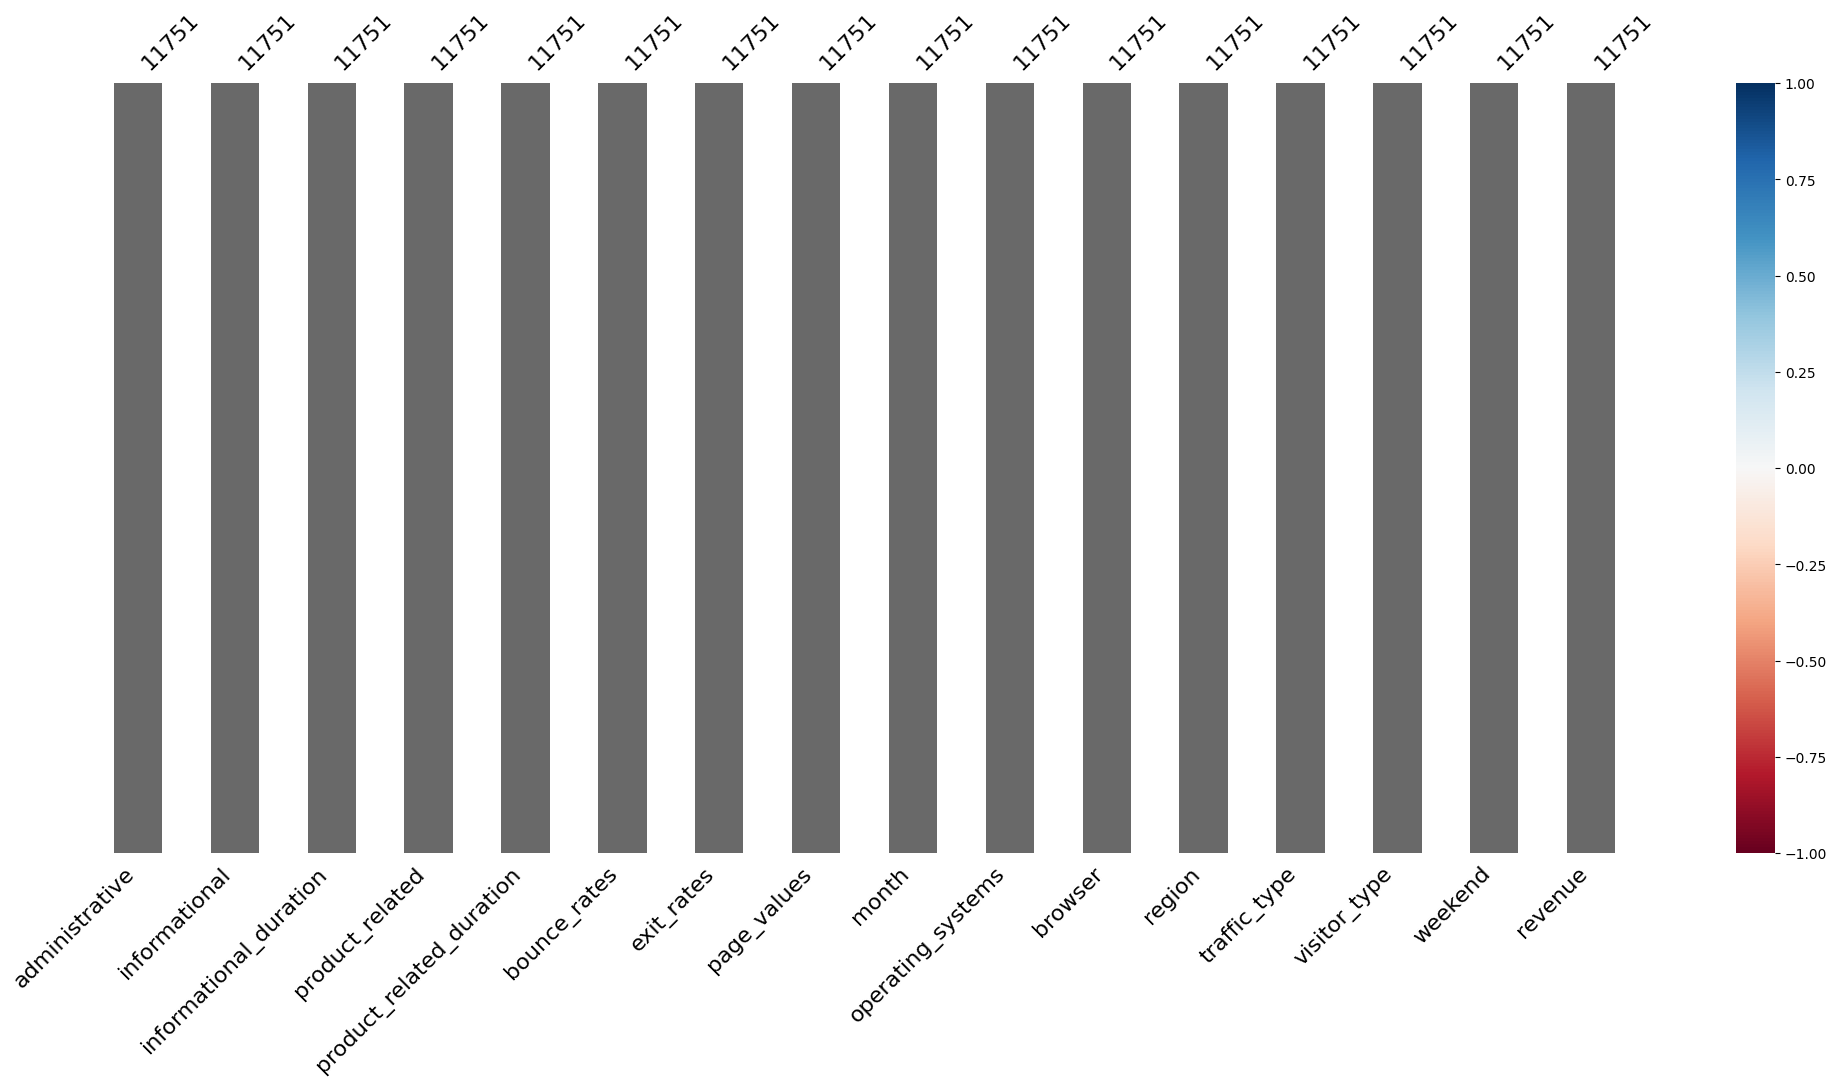

In [40]:
info = DataFrameInfo(df_transformed)
df_plots = Plotter(df_transformed)

get_null_info()

#### Successfully removed or imputed null-values.

# Milestone 3, Task 4: 
Perform transformations on skewed columns:

#### Checking distributions:

In [41]:
import seaborn as sns

To check the variables for skewness we can look at their distributions. This test is appropriate for continuous or ordinal data, so these will be analysed.

The non-numeric data type variables are: ['informational_duration', 'product_related_duration', 'month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend', 'revenue']


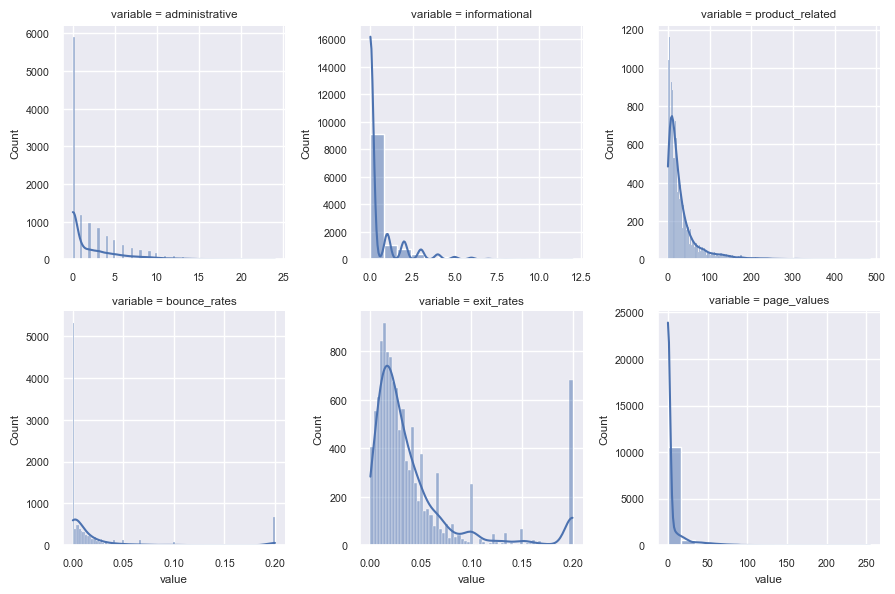

In [42]:
numeric_variables = ['administrative',
                     'informational',
                     'product_related',
                     'bounce_rates',
                     'exit_rates',
                     'page_values'
                    ]

categorical_features = [col for col in df_transformed.columns if col not in numeric_variables]
sns.set(font_scale=0.7)
f = pd.melt(df_transformed, value_vars=numeric_variables)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

print(f'The non-numeric data type variables are: {categorical_features}')

Initial observations:
- All 6 datasets have positive skew.
- Potential outliers in bounce_rates and exit_rates to explore further.

#### Measuring skew:

In [43]:
for column in numeric_variables:
    print(f'The skew is {df_transformed[column].skew()} for {column}.')

The skew is 1.9947748976479203 for administrative.
The skew is 3.1634812485899735 for informational.
The skew is 3.3213673621623707 for product_related.
The skew is 2.9754427146370177 for bounce_rates.
The skew is 2.2111460357592927 for exit_rates.
The skew is 6.112483791963979 for page_values.


In general a skewness value between -1 and +1 is considered excellent, but a value between -2 and +2 is considered acceptable. 

administrative skew is the only value within the acceptable range. However, because it is so close to the limit it will be investigated for correcting skewness.

#### Correcting skew:

#### administrative

In [44]:
df_plots = Plotter(df_transformed)
df_info = DataFrameInfo(df_transformed)

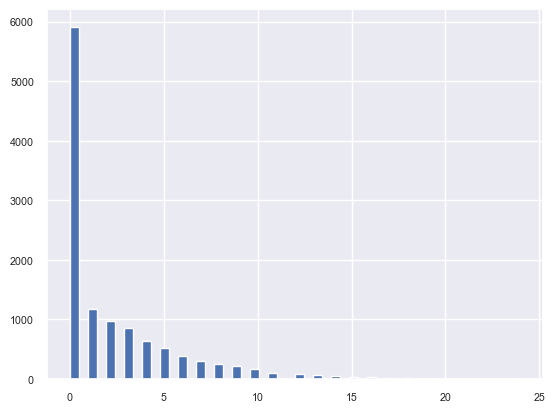

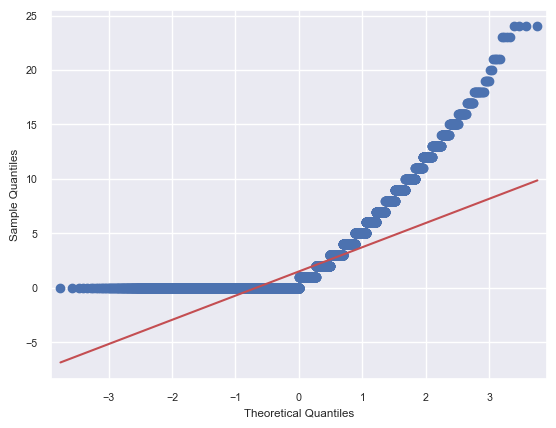

count    11751.000000
mean         2.208663
std          3.328054
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         24.000000
Name: administrative, dtype: float64

In [45]:
df_plots.histogram('administrative')
df_plots.qq_plot('administrative')
df_transformed['administrative'].describe()

There is a reasonable amount of skew, and a big gap between the 3rd quartile and the max. The next steps will investigate different methods to correct the skew.

#### Correcting the skew

#### log transform method

In [46]:
df_plots = Plotter(df_transformed)

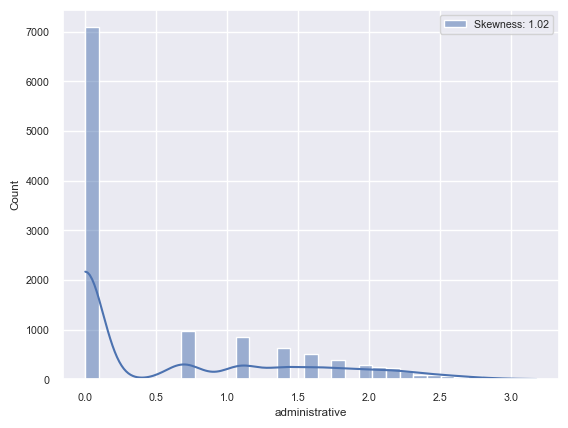

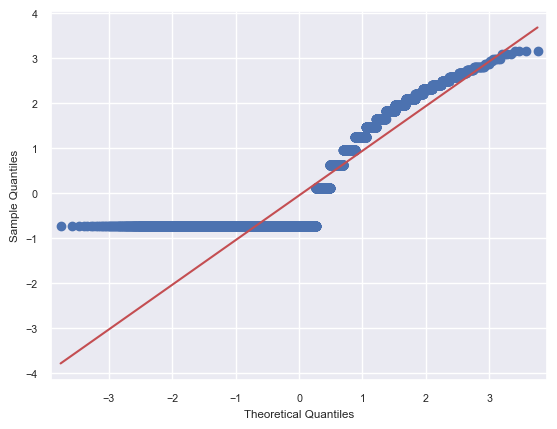

In [47]:
df_plots.log_transformation('administrative')

The log transform seems to be effective, bringing the skewness down to 1.02. This will likely be used to transform the data series, however let's explore other options first.

#### Box-Cox transformation

Cannot do Box-Cox because data must be positive

#### Yeo-Johnson

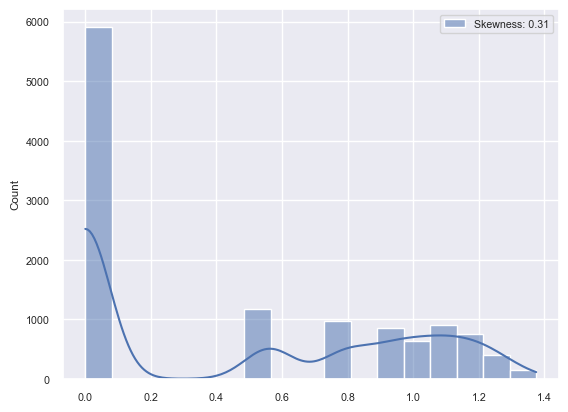

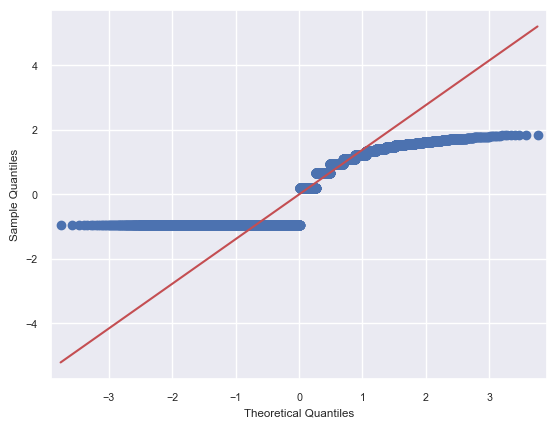

In [48]:
df_plots.yeojohnson('administrative')

##### administration skewness results

The log transformation method is the simplest and gives a satisfactory result. 

#### informational

Revisit the current dataset:

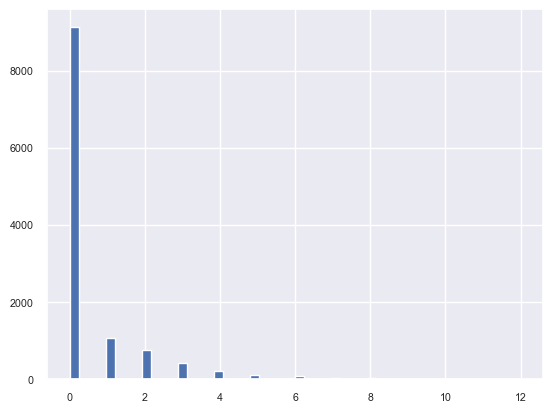

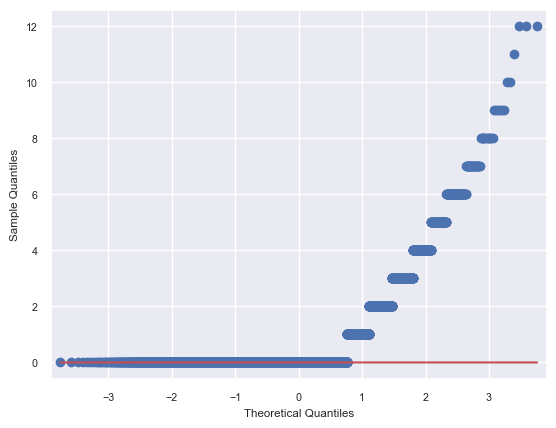

The skew is 3.1634812485899735.


In [49]:
df_plots.histogram('informational')
df_plots.qq_plot('informational')
df_transformed['informational'].describe()
print(f'The skew is {df_transformed['informational'].skew()}.')

#### log transform

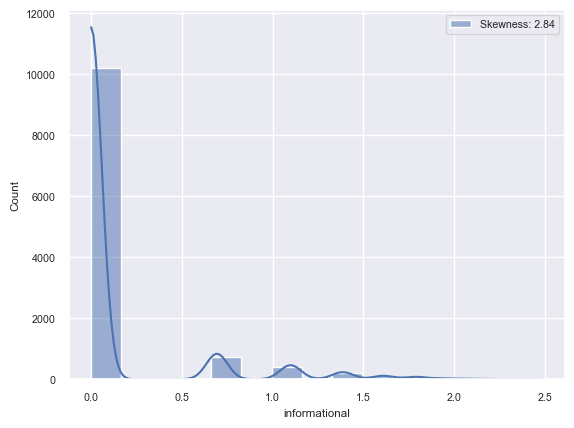

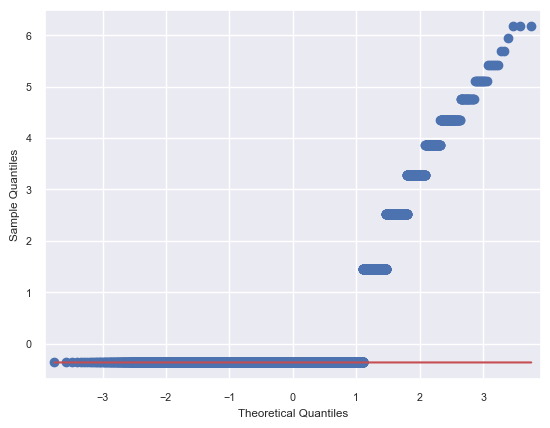

In [50]:
df_plots.log_transformation('informational')

#### Box-Cox

The Box-Cox will not work unless data is positive

#### Yeo-Johnson

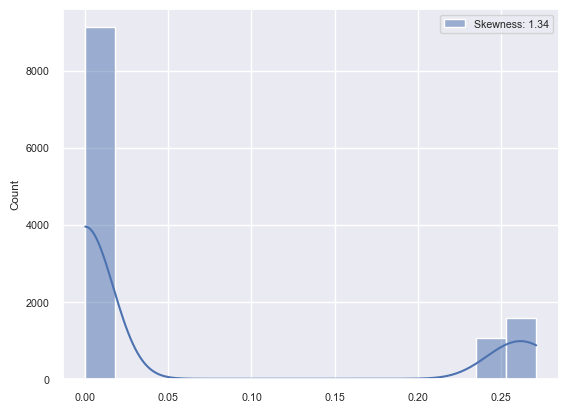

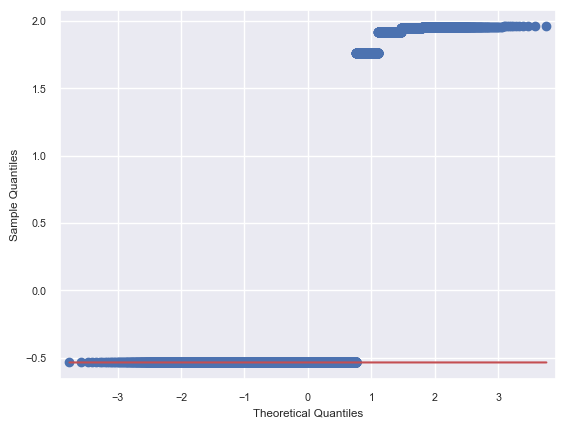

In [51]:
df_plots.yeojohnson('informational')

The Yeo-Johnson has brought the skewness value into the acceptable range, however the histogram suggests this is at a loss of a significant amount of data.
The problem seems to be a large count of zero valued data.

One solution is to increase the value of the column by 1, removing the zeros but not altering the structure. 

In [52]:
df_transformed['informational_plus_one'] = df_transformed['informational'] + 1

In [53]:
df_transformed['informational_plus_one'].describe()

count    11751.000000
mean         1.498766
std          1.172875
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: informational_plus_one, dtype: float64

In [54]:
df_plots = Plotter(df_transformed)

#### log transformation (informational_plus_one)

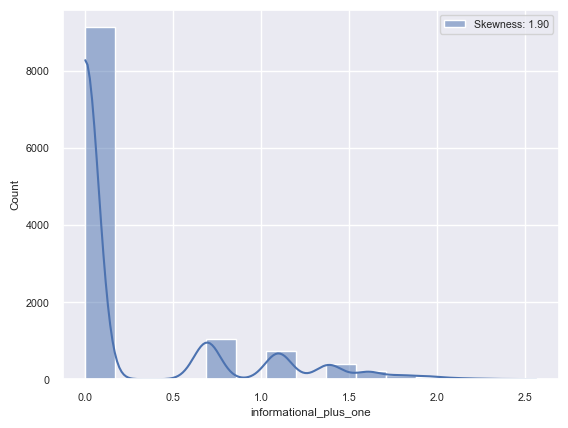

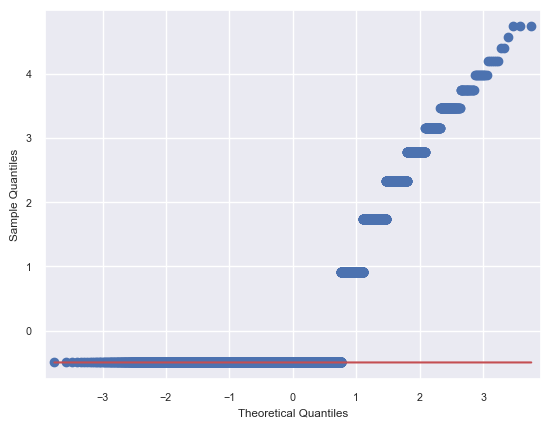

In [55]:
df_plots.log_transformation('informational_plus_one')

#### Box-Cox (informational_plus_one)

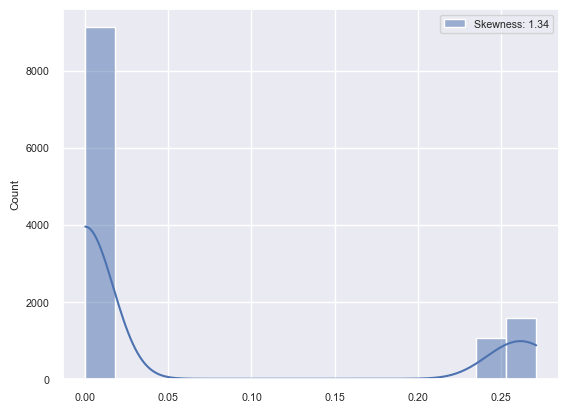

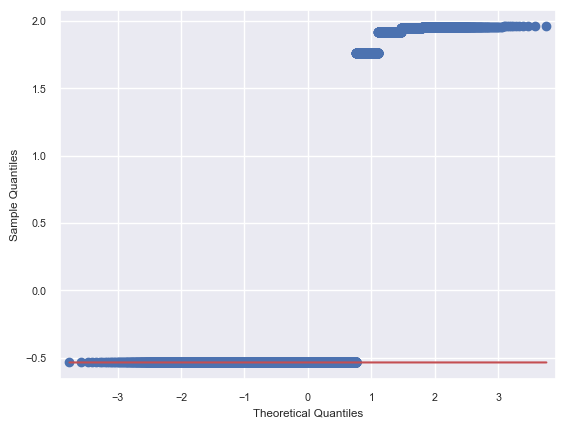

In [56]:
df_plots.boxcox('informational_plus_one')

#### Yeo-Johnson (informational_plus_one)

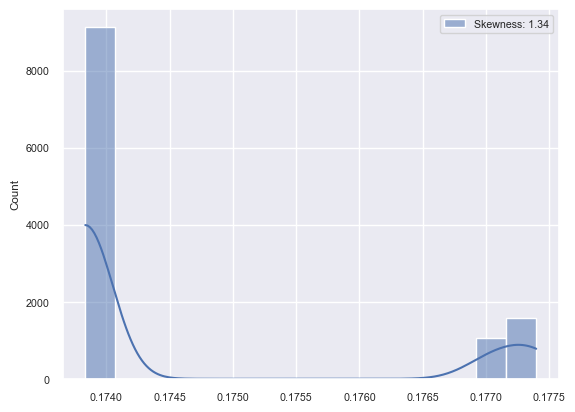

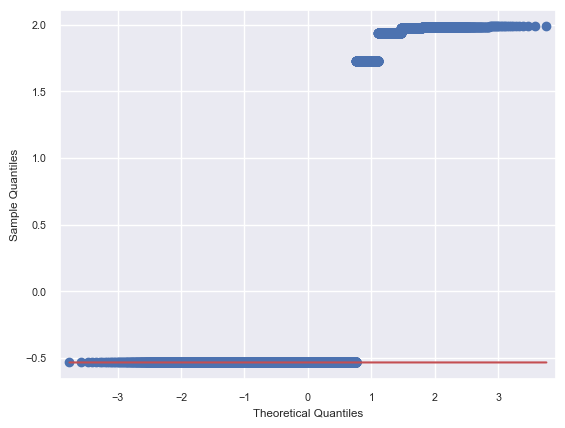

In [57]:
df_plots.yeojohnson('informational_plus_one')

##### informational skewness results

The log transformation method on informational_plus_one data reduced the skewness to acceptable level. Therefore, this will be used.

#### product_related 

Revisit the current dataset:

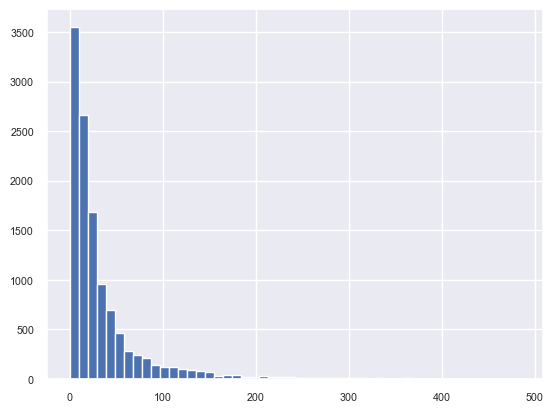

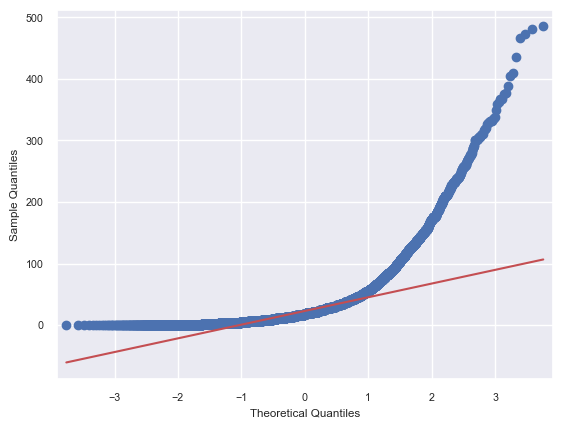

The skew is 3.3213673621623707.


In [58]:
df_plots.histogram('product_related')
df_plots.qq_plot('product_related')
df_transformed['product_related'].describe()
print(f'The skew is {df_transformed['product_related'].skew()}.')

#### log transform

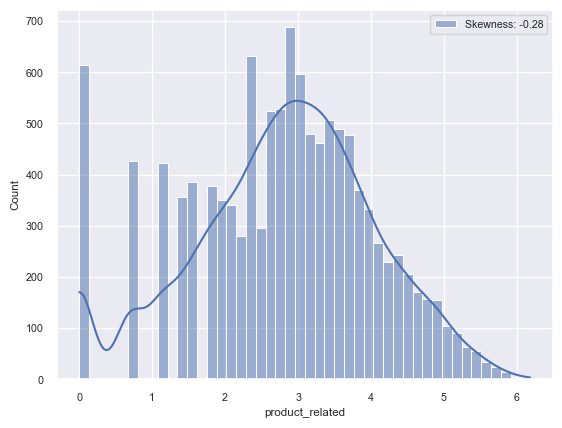

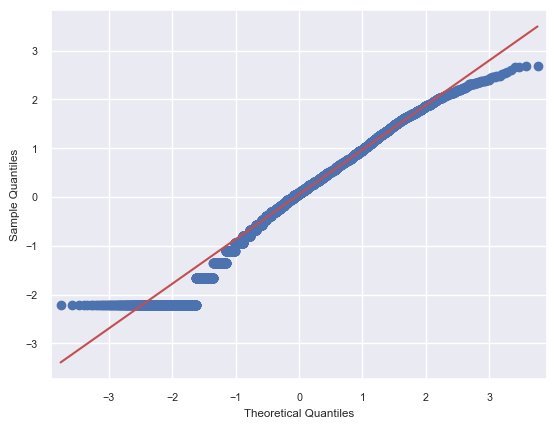

In [59]:
df_plots.log_transformation('product_related')

The log transform seems to be effective, bringing the skewness down to -0.28. This will likely be used to transform the data series, however let's explore other options first.

#### Box-Cox

Cannot do Box-Cox because data must be positive

#### Yeo-Johnson

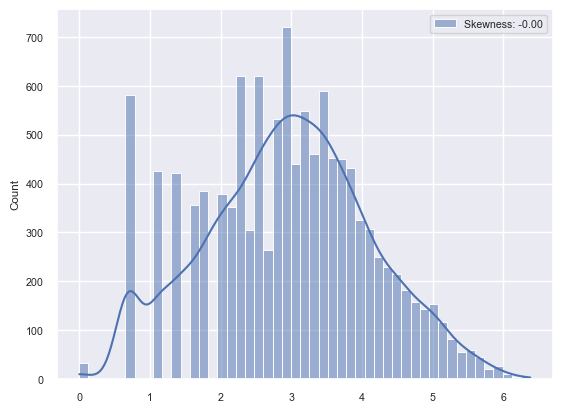

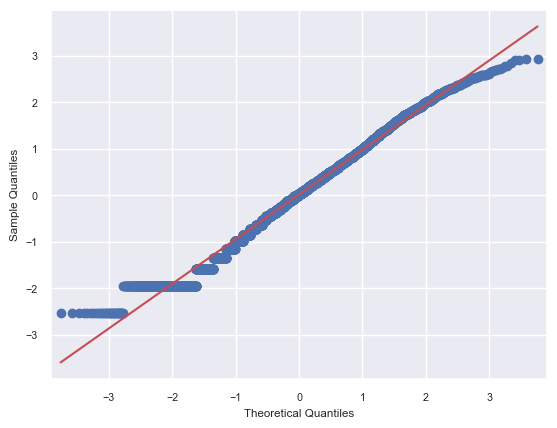

In [60]:
df_plots.yeojohnson('product_related')

##### product_related skewness results

Despite the Yeo-Johnson method correcting the skew value to 0.00, becasue the log transformation method is the simplest and gives a satisfactory result this will be used to transform the data. 

#### bounce_rates

Revisit the current dataset:

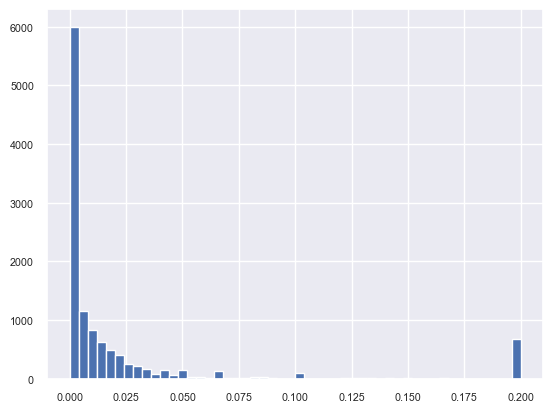

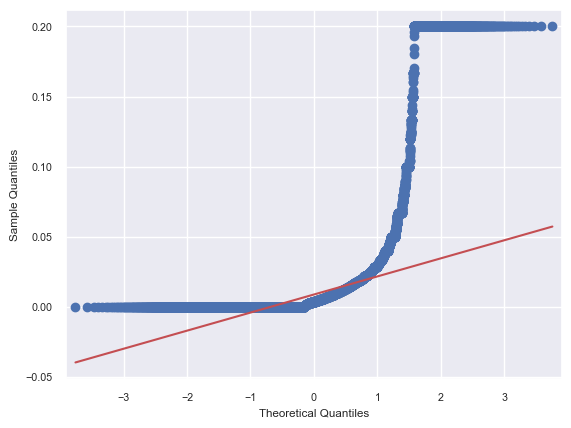

The skew is 2.9754427146370177.


In [61]:
df_plots.histogram('bounce_rates')
df_plots.qq_plot('bounce_rates')
df_transformed['bounce_rates'].describe()
print(f'The skew is {df_transformed['bounce_rates'].skew()}.')

#### log transform

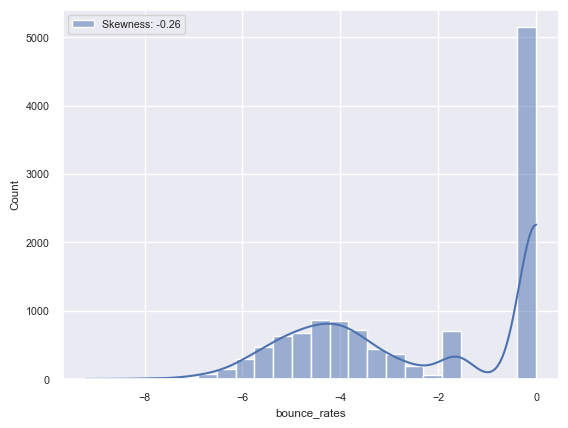

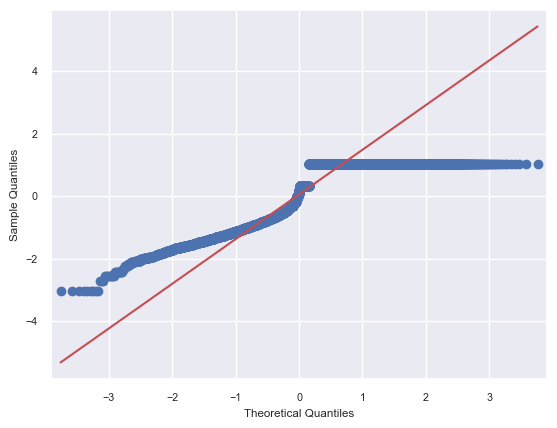

In [62]:
df_plots.log_transformation('bounce_rates')

The log transform seems to be effective, bringing the skewness down to -0.26. This will likely be used to transform the data series, however let's explore other options first.

#### Box-Cox

Cannot do Box-Cox because data must be positive

#### Yeo-Johnson

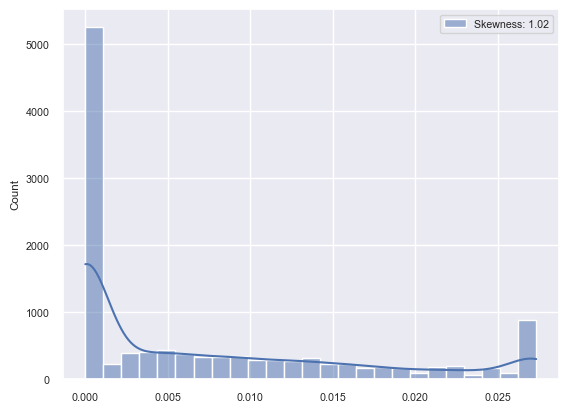

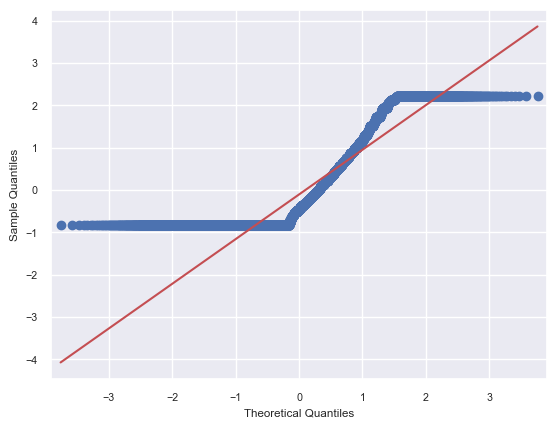

In [63]:
df_plots.yeojohnson('bounce_rates')

##### bounce_rates skewness results

By far the best result is the log transform method, so this will be used to transform the data. 

#### exit_rates

Revisit the current dataset:

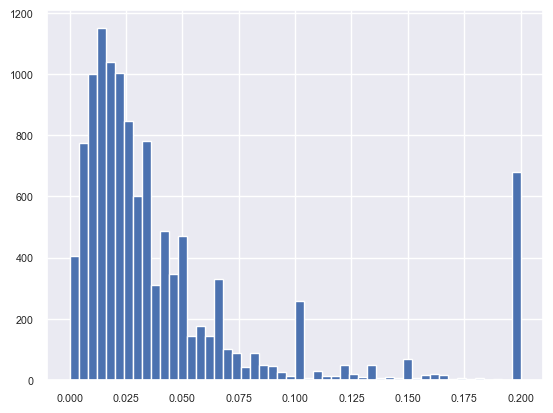

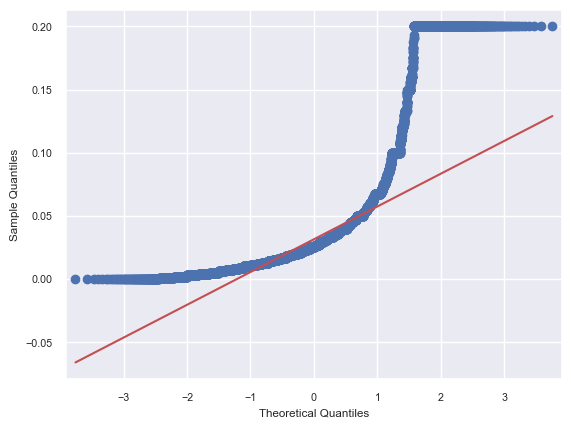

The skew is 2.2111460357592927.


In [64]:
df_plots.histogram('exit_rates')
df_plots.qq_plot('exit_rates')
df_transformed['exit_rates'].describe()
print(f'The skew is {df_transformed['exit_rates'].skew()}.')

#### log transform

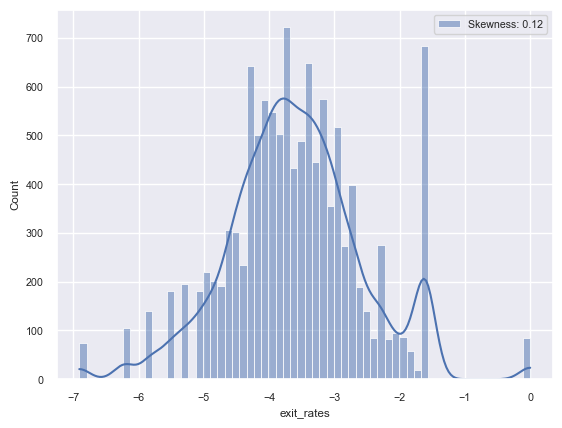

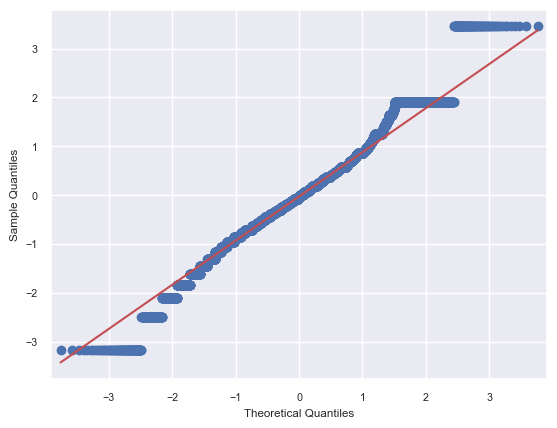

In [65]:
df_plots.log_transformation('exit_rates')

The log transform seems to be effective, bringing the skewness down to 0.12. This will likely be used to transform the data series, however let's explore other options first.

#### Box-Cox

Cannot do Box-Cox because data must be positive

#### Yeo-Johnson

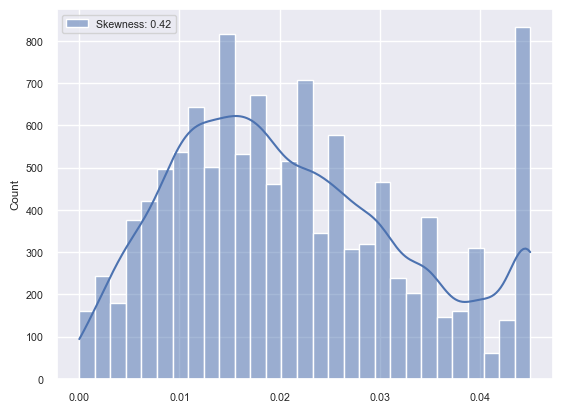

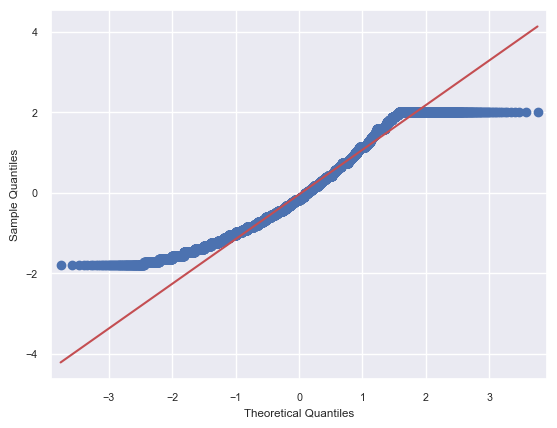

In [66]:
df_plots.yeojohnson('exit_rates')

##### exit_rates skewness results

By far the best result is the log transform method, so this will be used to transform the data. 

#### page_values

Revisit the current dataset:

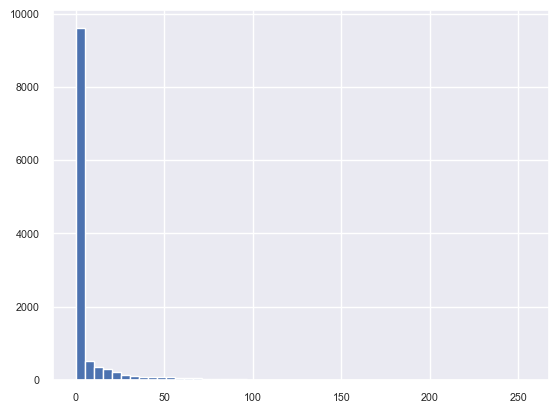

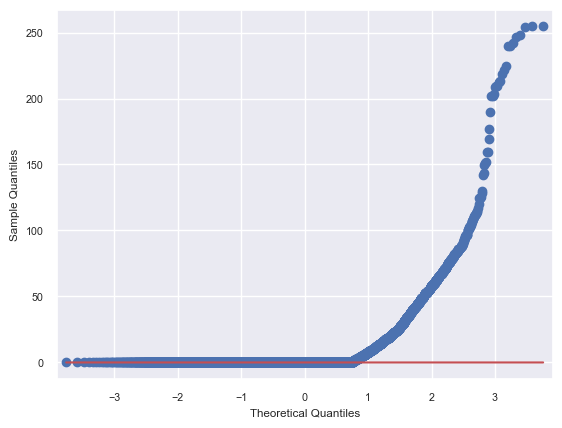

The skew is 6.112483791963979.


In [67]:
df_plots.histogram('page_values')
df_plots.qq_plot('page_values')
df_transformed['page_values'].describe()
print(f'The skew is {df_transformed['page_values'].skew()}.')

#### log transform

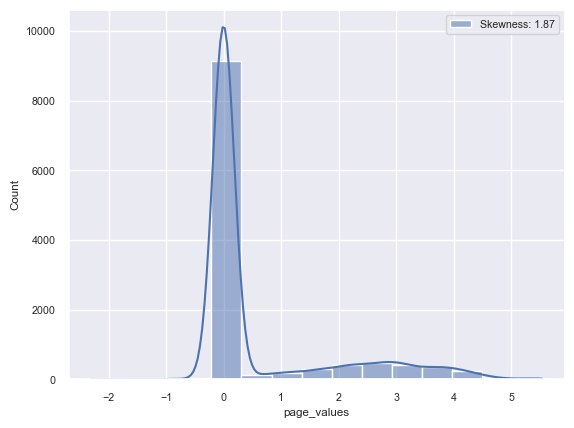

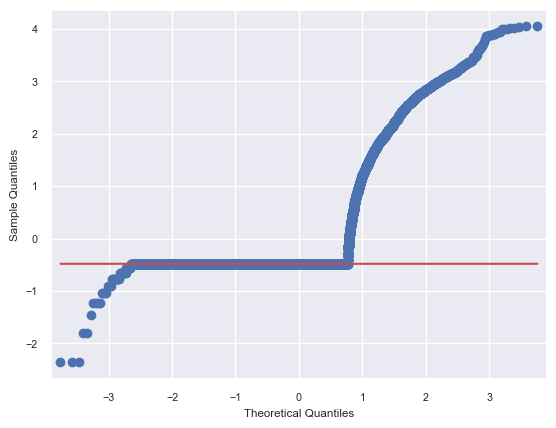

In [68]:
df_plots.log_transformation('page_values')

The log transform seems to be effective, bringing the skewness down to 1.87. This will likely be used to transform the data series, however let's explore other options first.

#### Box-Cox

Cannot do Box-Cox because data must be positive

#### Yeo-Johnson

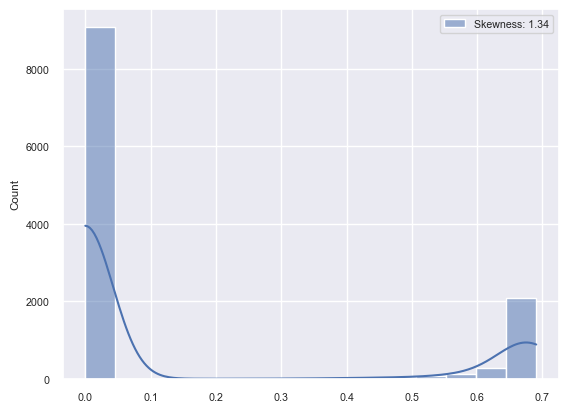

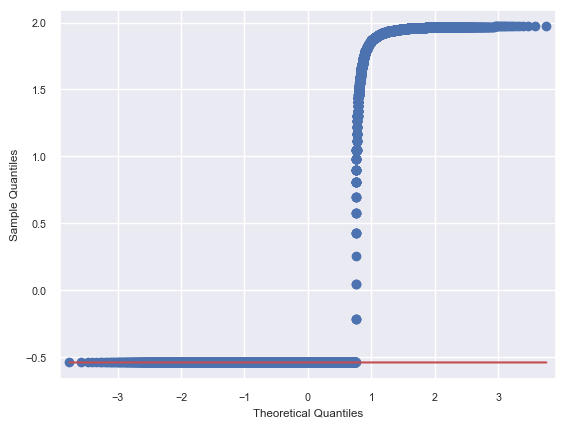

In [69]:
df_plots.yeojohnson('page_values')

##### page_values skewness results

The log transform method reduces the skewness value down to an acceptable limit, however the problem seems to be a large count of zero valued data.

One solution is to increase the value of the column by 1, removing the zeros but not altering the structure.  

In [70]:
df_transformed['page_values_plus_one'] = df_transformed['page_values'] + 1

In [71]:
df_transformed['page_values_plus_one'].describe()

count    11751.000000
mean         6.532891
std         17.387391
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        255.600000
Name: page_values_plus_one, dtype: float64

In [72]:
df_plots = Plotter(df_transformed)

#### log transformation (page_values_plus_one)

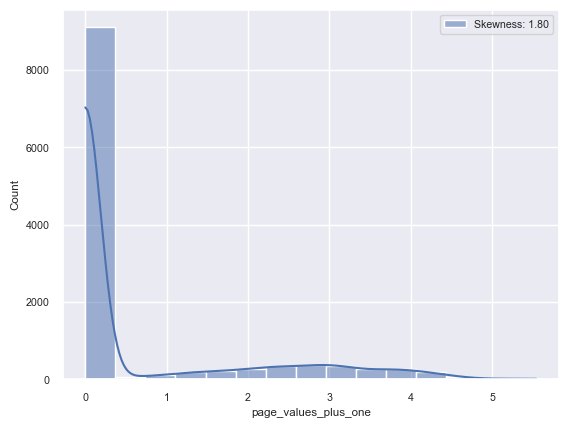

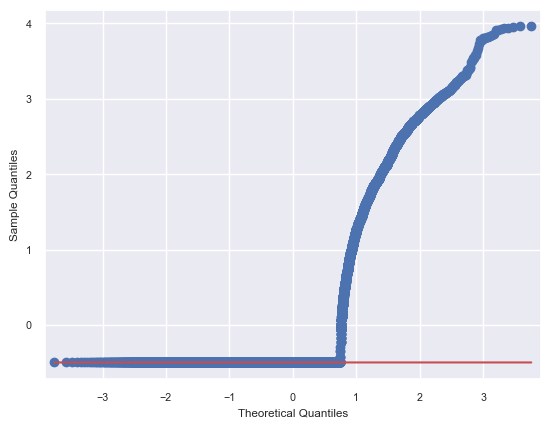

In [73]:
df_plots.log_transformation('page_values_plus_one')

#### Box-Cox (page_values_plus_one)

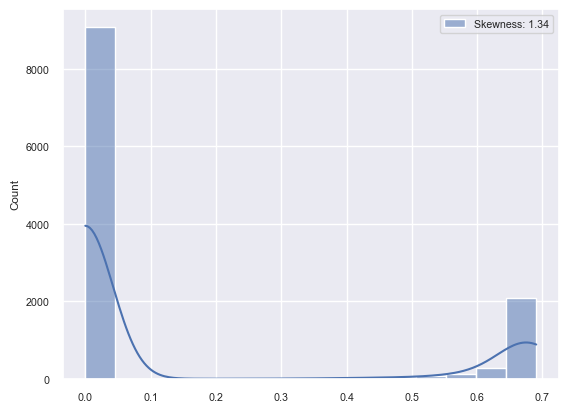

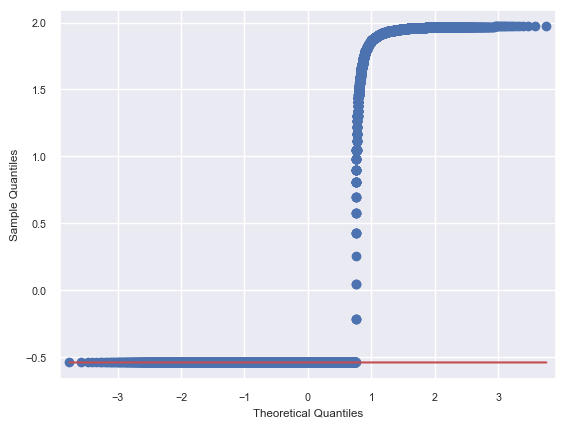

In [74]:
df_plots.boxcox('page_values_plus_one')

#### Yeo-Johnson (page_values_plus_one)

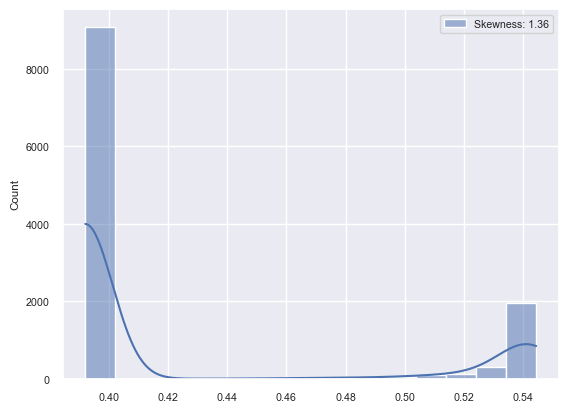

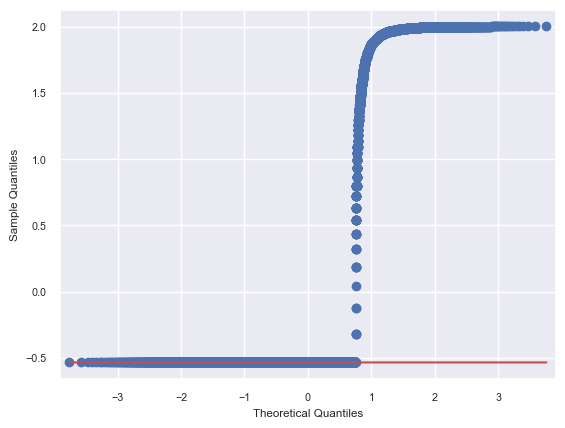

In [75]:
df_plots.yeojohnson('page_values_plus_one')

##### page_values skewness results

Considering all the potential transformation options the simplest method is the log transformation method on informational data which still reduced the skewness to acceptable level. Therefore, this will be used.

### Correcting skew

In [76]:
to_transform_list = ['administrative', 'informational_plus_one', 'product_related', 'bounce_rates', 'exit_rates', 'page_values_plus_one']
transform = DataFrameTransform(df_transformed)
transform.log_transformation(to_transform_list)

,administrative,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue,informational_plus_one,page_values_plus_one
0,0.000000,0,0 days 00:00:00,1.386294,0 days 00:00:00,-1.609438,-1.609438,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False,0.000000,0.000000
1,0.000000,0,0 days 00:00:00,3.258097,0 days 00:14:36,0.000000,-3.649659,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False,0.000000,0.000000
2,0.693147,0,0 days 00:00:00,2.944439,0 days 00:06:08,-3.228926,-2.956512,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False,0.000000,0.000000
3,0.000000,0,0 days 00:00:00,2.995732,0 days 00:23:52,-3.696912,-3.575551,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True,0.000000,1.029619
4,0.000000,0,0 days 00:00:00,3.496508,0 days 00:11:34,-4.261580,-3.442019,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.000000,0,0 days 00:00:00,2.772589,0 days 00:04:22,-4.605170,-3.381395,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False,0.000000,0.000000
12325,0.000000,4,0 days 00:01:52.220000,3.871201,0 days 00:31:38,-5.809143,-4.961845,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False,1.609438,0.000000
12326,1.609438,1,0 days 00:00:00,4.204693,0 days 00:36:42,-3.589940,-2.673649,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False,0.693147,0.000000
12327,0.000000,0,0 days 00:00:00,2.564949,0 days 00:05:16,0.000000,-4.074542,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False,0.000000,0.000000


In [77]:
numeric_variables = ['administrative',
                     'informational_plus_one',
                     'product_related',
                     'bounce_rates',
                     'exit_rates',
                     'page_values_plus_one'
                    ]

categorical_features = [col for col in df_transformed.columns if col not in numeric_variables]
sns.set(font_scale=0.7)
f = pd.melt(df_transformed, value_vars=numeric_variables)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

for column in numeric_variables:
    print(f'The skew is {df_transformed[column].skew()} for {column}.')

#### Result of correcting skew:

The 6 variables all have an acceptable value for skewness for subsequent analysis. 